In [45]:
import sqlite3
import pandas
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import importlib
import homelocationdf
import geostatdf
import regions

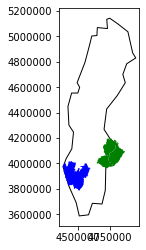

In [20]:
ax = regions.sweden.plot(facecolor='none', edgecolor='black')
regions.gothenburg.plot(ax=ax, color='blue')
regions.stockholm.plot(ax=ax, color='green')

In [56]:
homelocations_all = homelocationdf.load('sweloc')

,calc_name,user_id,type,latitude,longitude,count,percentage_total,percentage_next,radius_kilometers,geometry
0,sweloc,3271,home,37.773213,-122.447928,2,0.666667,0.000000,0.1,POINT (-122.44793 37.77321)
1,sweloc,5616,home,59.403225,17.955987,61,0.130064,0.704918,0.1,POINT (17.95599 59.40323)
2,sweloc,5976,home,56.053940,12.684570,5,0.075758,0.800000,0.1,POINT (12.68457 56.05394)
3,sweloc,6657,home,39.091586,-77.203932,3,0.100000,1.000000,0.1,POINT (-77.20393 39.09159)
4,sweloc,8981,home,59.317224,18.026986,72,0.314410,0.125000,0.1,POINT (18.02699 59.31722)


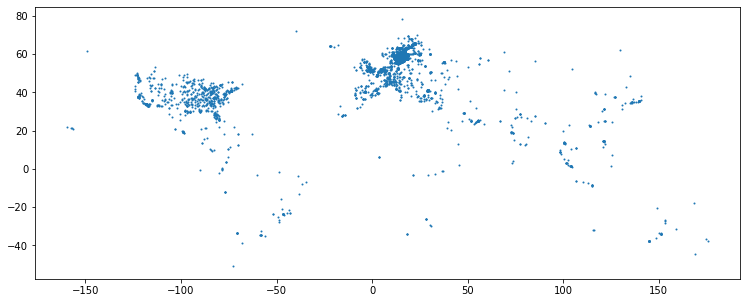

In [84]:
f, a = plt.subplots(figsize=(15,5))
homelocations_all.plot(ax=a, markersize=1)
homelocations_all.head()

In [78]:
def plothomelocations(hl):
    fig, ax = plt.subplots(figsize=(15,5))
    sc = ax.scatter(
        hl['percentage_total'], 
        hl['count'],
        s=2, 
        c=hl['percentage_next'],
    )
    plt.xlabel('percentage_total')
    plt.ylabel('count')
    cb = plt.colorbar(sc)
    cb.set_label('percentage_next')

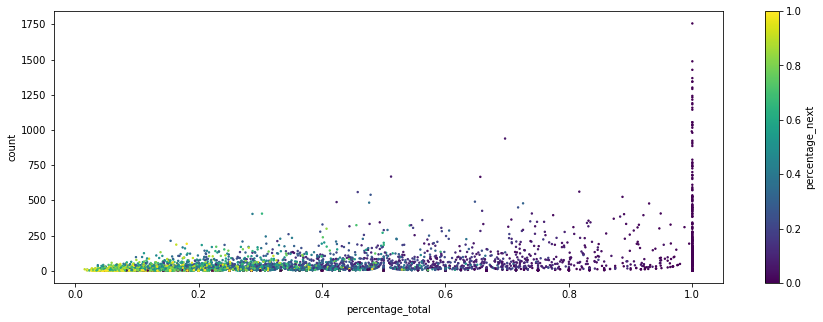

In [79]:
plothomelocations(homelocations_all)

In [43]:
homelocations = homelocations_all.to_crs(regions.sweden.crs)
print(homelocations.shape)
homelocations = geopandas.clip(homelocations, regions.sweden)
print(homelocations.shape)

(3966, 10)
(3966, 10)


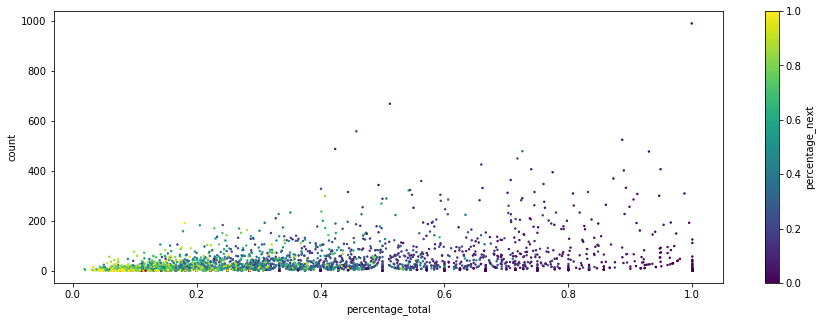

In [81]:
plothomelocations(homelocations)

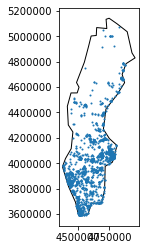

In [44]:
ax = regions.sweden.plot(facecolor='none', edgecolor='black')
homelocations.plot(ax=ax, markersize=1)

In [40]:
national_geostat = geostatdf.load(mask=regions.sweden)
national_homelocations = geostatdf.merge_home_location(national_geostat, homelocations)

/Users/ericwennerberg/opt/miniconda3/envs/mscthesis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


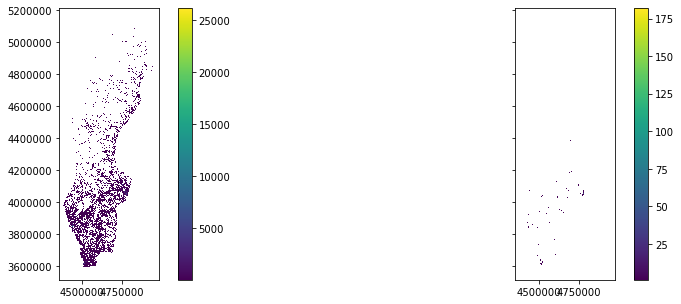

In [41]:
fig, axes = plt.subplots(1,2, figsize=(15,5), sharex=True, sharey=True)
national_geostat.plot(ax=axes[0], column='TOT_P', legend=True)
national_homelocations.plot(ax=axes[1], column='twitter_users', legend=True)

In [34]:
gbg_geostat = geostatdf.load(mask=regions.gothenburg)
gbg_homelocations = geopandas.clip(homelocations, regions.gothenburg)
gbg_homelocations = geostatdf.merge_home_location(gbg_geostat, gbg_homelocations)

/Users/ericwennerberg/opt/miniconda3/envs/mscthesis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


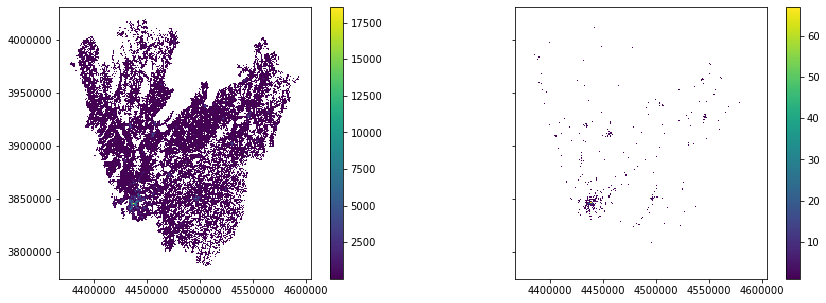

In [39]:
fig, axes = plt.subplots(1,2, figsize=(15,5), sharex=True, sharey=True)
gbg_geostat.plot(ax=axes[0], column='TOT_P', legend=True)
gbg_homelocations.plot(ax=axes[1], column='twitter_users', legend=True)

In [36]:
sthlm_geostat = geostatdf.load(mask=regions.stockholm)
sthlm_homelocations = geopandas.clip(homelocations, regions.stockholm)
sthlm_homelocations = geostatdf.merge_home_location(sthlm_geostat, sthlm_homelocations)

/Users/ericwennerberg/opt/miniconda3/envs/mscthesis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


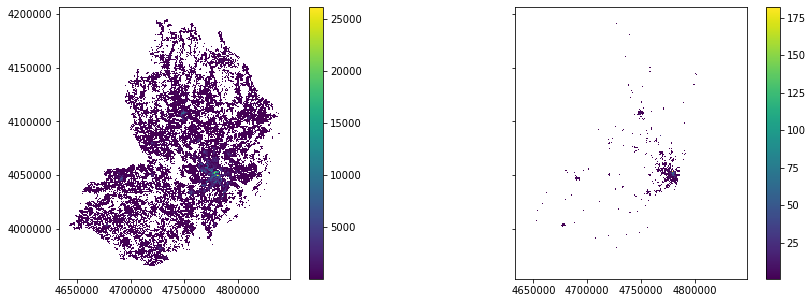

In [38]:
fig, axes = plt.subplots(1,2, figsize=(15,5), sharex=True, sharey=True)
sthlm_geostat.plot(ax=axes[0], column='TOT_P', legend=True)
sthlm_homelocations.plot(ax=axes[1], column='twitter_users', legend=True)